<a href="https://colab.research.google.com/github/Causodes/Cheapoline---CS-M117/blob/master/Image%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 2.3 Acquiring the Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab.patches import cv2_imshow
import cv2
vid = cv2.VideoCapture('drive/My Drive/CS188_HW2_Data/AAA.MOV')
success, image = vid.read()
count = 0
while success:
  filename = 'drive/My Drive/CS188_HW2_Data/frame_' + str(count).zfill(3) + '.jpg'
  raw_filename = 'drive/My Drive/CS188_HW2_Data/raw_frame_' + str(count).zfill(3) + '.jpg'
  cv2.imwrite(raw_filename, image)
  cv2.imwrite(filename, cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
  success, image = vid.read()
  count += 1


# 2.4 Registering the Frames

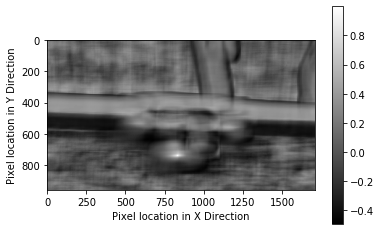

In [0]:
import matplotlib.pyplot as plt
import cv2
from skimage.feature import match_template
import skimage
image = skimage.io.imread('drive/My Drive/CS188_HW2_Data/frame_000.jpg', cv2.IMREAD_GRAYSCALE)
template = skimage.io.imread('drive/My Drive/CS188_HW2_Data/case_template.jpg', cv2.IMREAD_GRAYSCALE)
cross_cor = match_template(image, template)

fig, ax = plt.subplots()

im = ax.imshow(cross_cor, cmap="gray")
ax.set_ylabel("Pixel location in Y Direction")
ax.set_xlabel("Pixel location in X Direction")
fig.colorbar(im, ax=ax)
fig.savefig("drive/My Drive/CS188_HW2_Data/cross_correlation.jpg")
#cv2.imwrite("drive/My Drive/CS188_HW2_Data/cross_correlation.jpg", 255*cross_cor)

In [0]:
import numpy as np
count = 0
template = skimage.io.imread('drive/My Drive/CS188_HW2_Data/case_template.jpg', cv2.IMREAD_GRAYSCALE)
xshift = []
yshift = []
while count < 512:
  filename = 'drive/My Drive/CS188_HW2_Data/frame_' + str(count).zfill(3) + '.jpg'
  image = skimage.io.imread(filename, cv2.IMREAD_GRAYSCALE)
  cross_cor = match_template(image, template)
  ij = np.unravel_index(np.argmax(cross_cor), cross_cor.shape)
  x, y = ij[::-1]
  xshift.append(x)
  yshift.append(y)
  count += 1

plt.plot(xshift, yshift)
plt.ylabel("Y Pixel Shift")
plt.xlabel("X Pixel Shift")
plt.savefig('drive/My Drive/CS188_HW2_Data/pixel_shift.jpg')

%store xshift
%store yshift

NameError: ignored

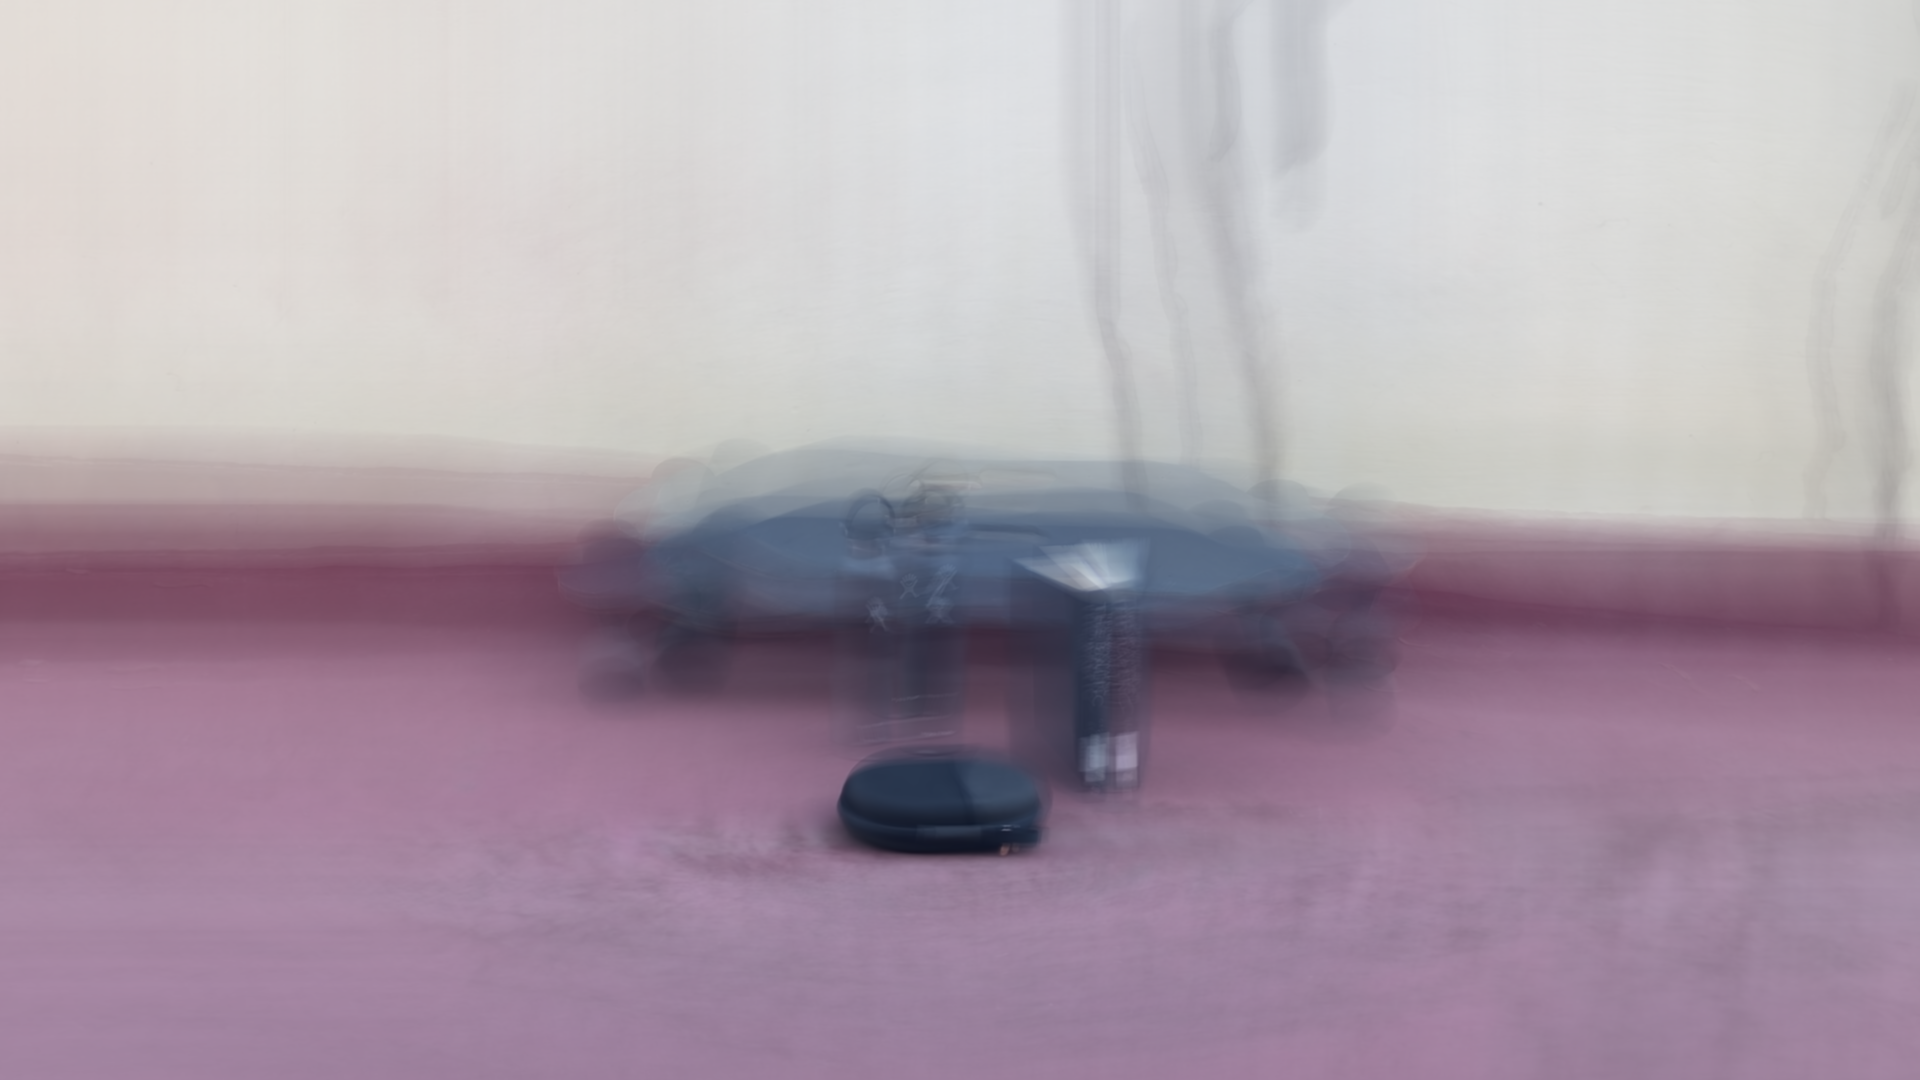

True

In [0]:
import numpy as np
%store -r xshift
%store -r yshift
count = 1
sum_image = cv2.imread('drive/My Drive/CS188_HW2_Data/raw_frame_000.jpg', cv2.IMREAD_COLOR)
sum_image = sum_image / 512
while count < 512:
  raw_filename = 'drive/My Drive/CS188_HW2_Data/raw_frame_' + str(count).zfill(3) + '.jpg'
  raw_file = cv2.imread(raw_filename, cv2.IMREAD_COLOR)
  rows,cols = raw_file.shape[:2]
  translation_matrix = np.float32([[1,0, xshift[0]-xshift[count]],[0,1, yshift[0]-yshift[count]]])
  dst = cv2.warpAffine(raw_file, translation_matrix,(cols,rows), borderMode=cv2.BORDER_REPLICATE)
  dst = dst / 512
  sum_image = cv2.add(sum_image, dst)
  count += 1
cv2_imshow(sum_image)
cv2.imwrite('drive/My Drive/CS188_HW2_Data/sum_image.jpg', sum_image)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.feature import match_template
import skimage

count = 0
template = skimage.io.imread('drive/My Drive/CS188_HW2_Data/bottle_template.jpg', cv2.IMREAD_GRAYSCALE)
xshift = []
yshift = []
while count < 512:
  filename = 'drive/My Drive/CS188_HW2_Data/frame_' + str(count).zfill(3) + '.jpg'
  image = skimage.io.imread(filename, cv2.IMREAD_GRAYSCALE)
  cross_cor = match_template(image, template)
  ij = np.unravel_index(np.argmax(cross_cor), cross_cor.shape)
  x, y = ij[::-1]
  xshift.append(x)
  yshift.append(y)
  count += 1


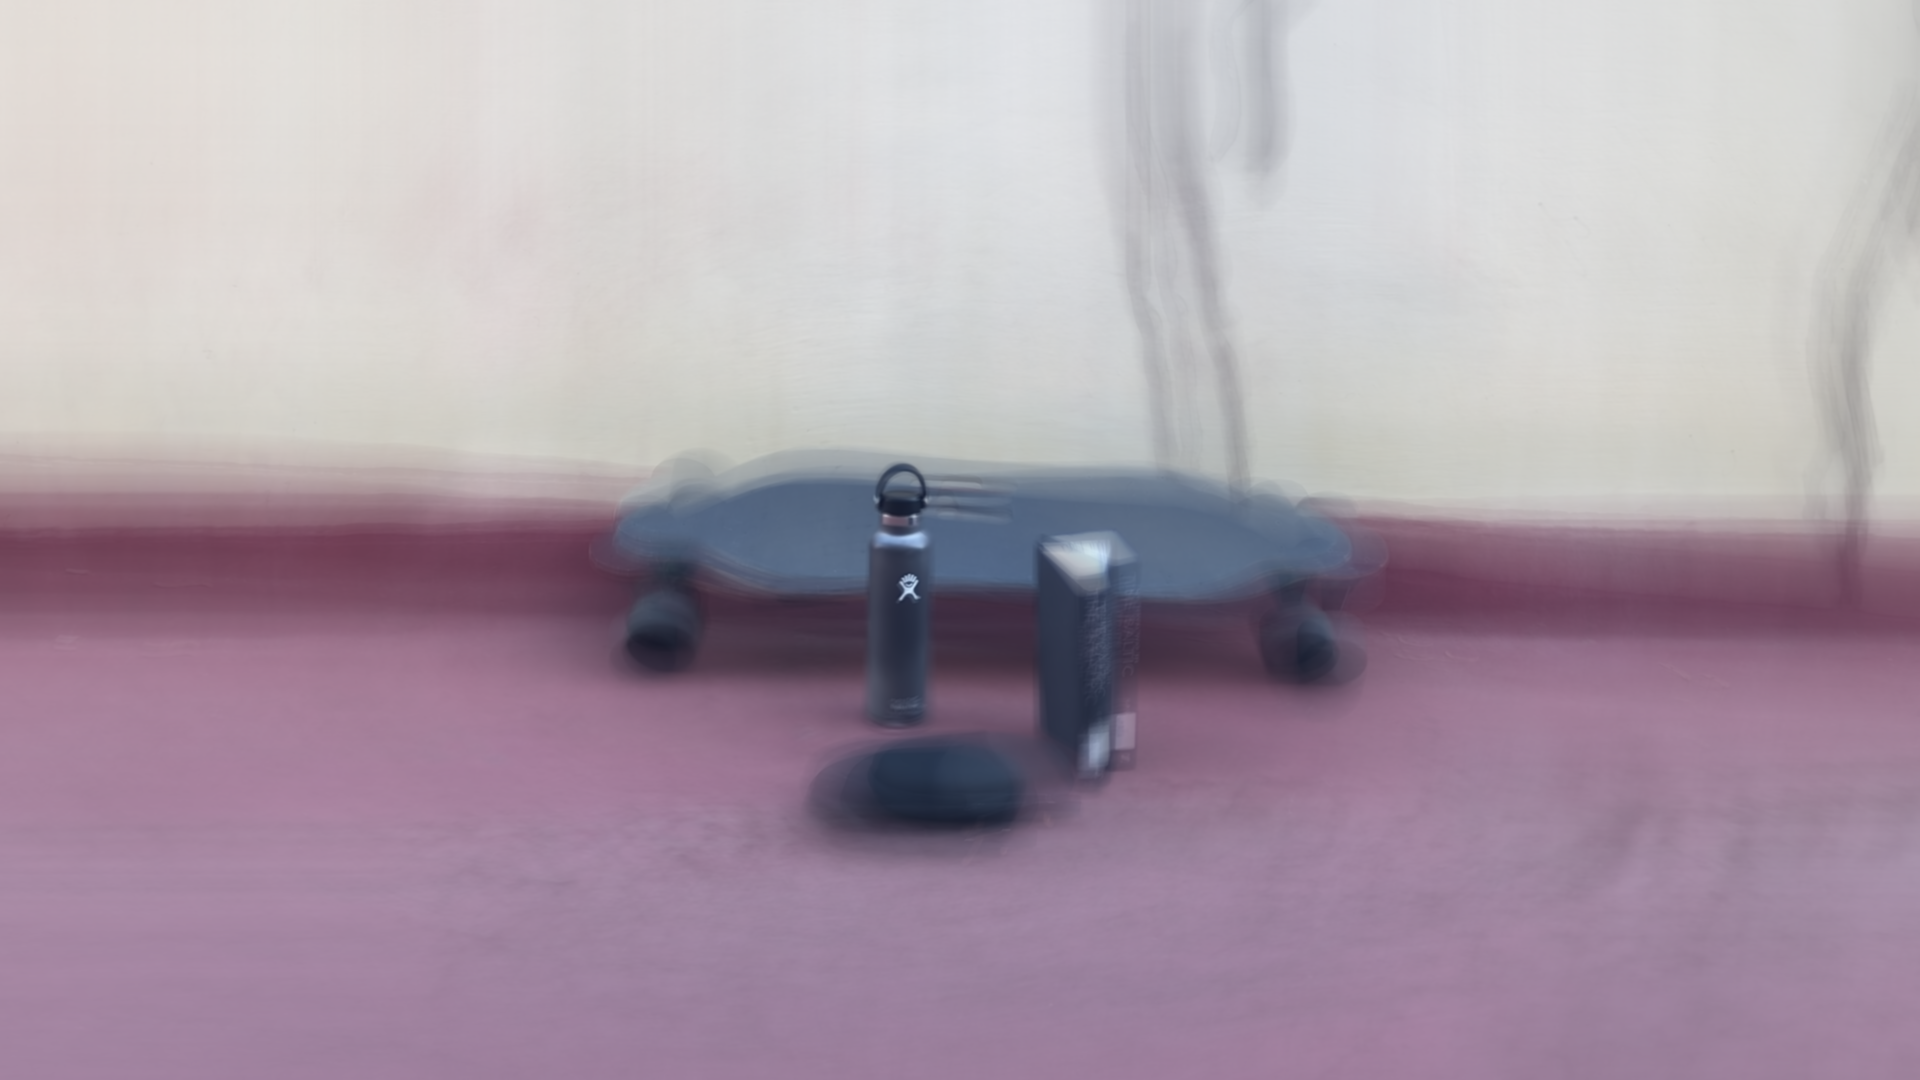

True

In [0]:
count = 1
sum_image = cv2.imread('drive/My Drive/CS188_HW2_Data/raw_frame_000.jpg', cv2.IMREAD_COLOR)
sum_image = sum_image / 512
while count < 512:
  raw_filename = 'drive/My Drive/CS188_HW2_Data/raw_frame_' + str(count).zfill(3) + '.jpg'
  raw_file = cv2.imread(raw_filename, cv2.IMREAD_COLOR)
  rows,cols = raw_file.shape[:2]
  translation_matrix = np.float32([[1,0, xshift[0]-xshift[count]],[0,1, yshift[0]-yshift[count]]])
  dst = cv2.warpAffine(raw_file, translation_matrix,(cols,rows), borderMode=cv2.BORDER_REPLICATE)
  dst = dst / 512
  sum_image = cv2.add(sum_image, dst)
  count += 1
cv2_imshow(sum_image)
cv2.imwrite('drive/My Drive/CS188_HW2_Data/sum_bottle_image.jpg', sum_image)


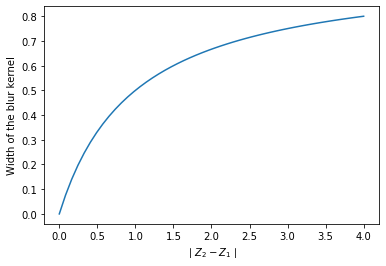

In [0]:
import matplotlib.pyplot as plt
import numpy
Z1 = numpy.linspace(1, 1, 50)
Z2 = numpy.linspace(1, 5, 50)

Y = numpy.abs((Z2-Z1) / numpy.multiply(Z1, Z2))
plt.plot(numpy.abs(Z2-Z1), Y)
plt.xlabel(r"$\mid Z_2-Z_1 \mid$")
plt.ylabel("Width of the blur kernel")
plt.savefig('distance_plot.jpg')

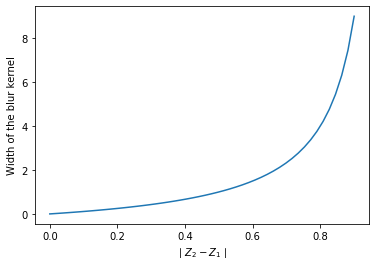

In [0]:
Z3 = numpy.linspace(.1, 1, 50)
Y = numpy.abs((Z3-Z1) / numpy.multiply(Z1, Z3))
plt.plot(numpy.abs(Z3-Z1), Y)
plt.xlabel(r"$\mid Z_2-Z_1 \mid$")
plt.ylabel("Width of the blur kernel")
plt.savefig('distance_plot_close.jpg')

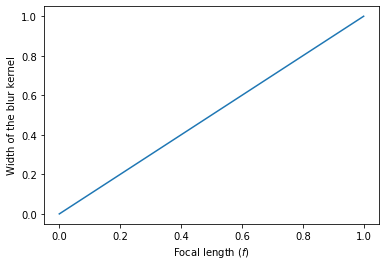

In [0]:
X = numpy.linspace(0, 1, 50)
Y = X
plt.plot(X, Y)
plt.xlabel(r"Focal length ($f$)")
plt.ylabel("Width of the blur kernel")
plt.savefig('f_plot.jpg')
